In [1]:
#Step 1 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [19]:
#Step 2
Diabetes = pd.read_excel(r"D:/Diabetes_D4.xlsx")

Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [3]:
Diabetes.head()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [4]:
#Step 3 - Feature Selection
feature_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = Diabetes[feature_cols]
y = Diabetes.Outcome

In [5]:
#Step 4 - Splitting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 ,random_state = 1)

In [6]:
#Step 5 Building the model
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [7]:
#Step6 Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.6493506493506493


In [8]:
!pip install pydotplus

In [9]:
!pip install graphviz

In [10]:
!pip install Graphviz

In [11]:
pip show graphviz

Name: graphviz
Version: 0.20.3
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: D:\Anaconda\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"  

In [13]:
os.system('dot -version')

0

In [14]:
#Step 7 Visualization
from io import StringIO
import  six
import sys
sys.modules['sklearn.externals.six']=six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

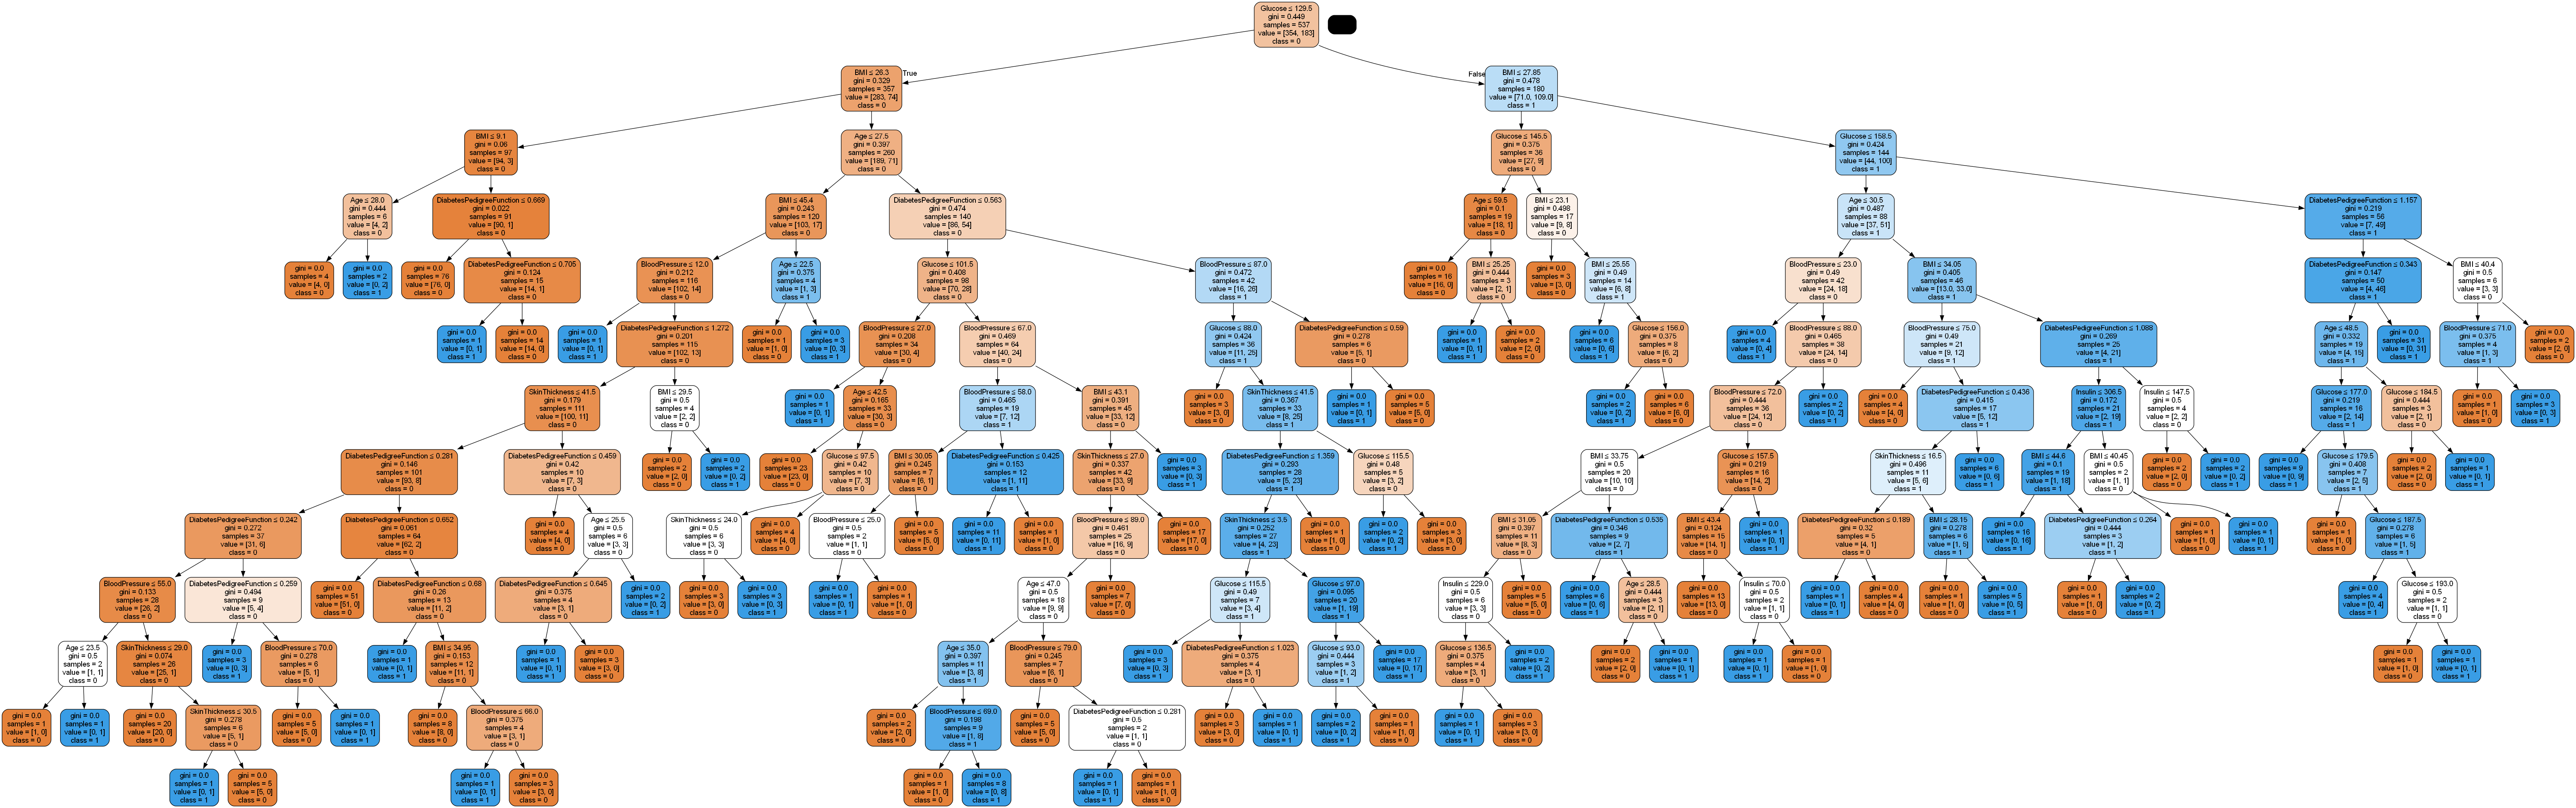

In [15]:
#Step 7A
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,  special_characters=True,feature_names=feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Diabetes.png')
Image(graph.create_png())

In [16]:
#Step8 Classifier
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7705627705627706


In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

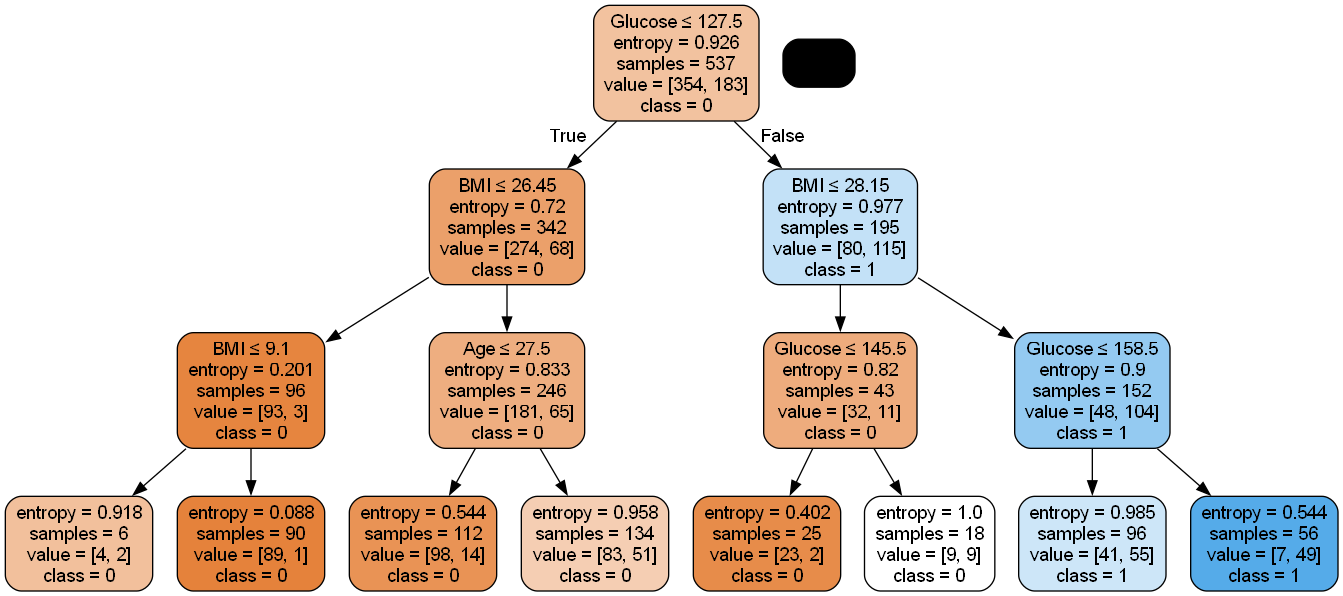

In [18]:
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,  special_characters=True,feature_names=feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Diabetes.png')
Image(graph.create_png())

Interpretation
1)Root Node Glucose <-  127.5
If glucose < 127.5 follow the left branch
If glucose > 127.5 follow the right branch

2)Left Branch  BMI < 26.45
If BMI < 26.45  , predict "Not Diabetic"
If BMI > 26.45  , predict "Diabetic"

3)Right Branch - Age < 27.5
If Age < 27.5 predict "Not Diabetic"
If Age > 27.5 predict "Diabetic"



Insights
Importance of Glucose level -Glucose is the most important factor determining Diabetes
BMI and Age as subfactors
If glucose is low
If glucse is high

Interactions between features - How the risk chances with contribution of Glucose , BMI and Age
Importance of Glucose Levels
